# **Import required libraries**

In [1]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Input, BatchNormalization
from keras.constraints import maxnorm
from keras.models import Model
from keras.optimizers import *
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint


# **Load data**

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


# **Normalize data**

In [3]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [4]:
print(X_train.shape)

(50000, 32, 32, 3)


# **One hot encode labels**

In [5]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [6]:
print(num_classes)

10


# **Create the model**


**Follow the instruction below and then report how the performance changed**

1.Convolutional input layer, 32 feature maps with a size of 3×3 and a rectifier activation function.

2.Dropout layer at 20%.

3.Convolutional layer, 32 feature maps with a size of 3×3 and a rectifier activation function.

4.Max Pool layer with size 2×2.

5.Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function.

6.Dropout layer at 20%.

7.Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function.

8.Max Pool layer with size 2×2.

9.Convolutional layer, 128 feature maps with a size of 3×3 and a rectifier activation function.

10.Dropout layer at 20%.

11.Convolutional layer,128 feature maps with a size of 3×3 and a rectifier activation function.

12.Max Pool layer with size 2×2.

13.Flatten layer.

14.Dropout layer at 20%.

15.Fully connected layer with 1024 units and a rectifier activation function.

16.Dropout layer at 20%.

17.Fully connected layer with 512 units and a rectifier activation function.

18.Dropout layer at 20%.

19.Fully connected output layer with 10 units and a softmax activation function



In [7]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(32,32, 3), padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

In [8]:
epochs = 10
lrate = 0.001
adam = tf.keras.optimizers.Adam(learning_rate=lrate)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0         
                                                        

In [10]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=128, verbose=1)

Epoch 1/10
391/391 [==============================] - 46s 40ms/step - loss: 1.6835 - accuracy: 0.3715 - val_loss: 1.3327 - val_accuracy: 0.5204
Epoch 2/10
391/391 [==============================] - 15s 39ms/step - loss: 1.2041 - accuracy: 0.5639 - val_loss: 1.0665 - val_accuracy: 0.6215
Epoch 3/10
391/391 [==============================] - 15s 39ms/step - loss: 0.9943 - accuracy: 0.6433 - val_loss: 0.9401 - val_accuracy: 0.6663
Epoch 4/10
391/391 [==============================] - 15s 38ms/step - loss: 0.8735 - accuracy: 0.6898 - val_loss: 0.8789 - val_accuracy: 0.6923
Epoch 5/10
391/391 [==============================] - 15s 38ms/step - loss: 0.7720 - accuracy: 0.7266 - val_loss: 0.7955 - val_accuracy: 0.7243
Epoch 6/10
391/391 [==============================] - 15s 39ms/step - loss: 0.6933 - accuracy: 0.7573 - val_loss: 0.7452 - val_accuracy: 0.7438
Epoch 7/10
391/391 [==============================] - 15s 37ms/step - loss: 0.6367 - accuracy: 0.7760 - val_loss: 0.6608 - val_accuracy:

In [11]:
from keras.models import load_model
# Save the model
model.save('cifar10_model.h5')
# Loading the model
saved_model = load_model('cifar10_model.h5')

# Model evaluation
scores = saved_model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy after adding Convolutional layers: %.2f%%" % (scores[1]*100))

Test Accuracy after adding Convolutional layers: 79.23%


**Findings: The usecase provided model had accuracy of 60% with limited layers. But in the above case we added more layers of convolution, maxpooling and dropout layers hence accuracy increased to 78.87%.**

**2.Change the previous model into Keras Functional API model.**


In [12]:
(X_train, y_train), (X_val, y_val) = cifar10.load_data()
X_train, X_val = X_train / 255.0, X_val / 255.0
y_train, y_val = y_train.flatten(), y_val.flatten()

i = Input(shape = X_train[1].shape)
x = Conv2D(32, (3,3), padding="same", activation="relu")(i)
x = Conv2D(32, (3,3), activation="relu")(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Dropout(0.2)(x)
x = Conv2D(64, (3,3), padding="same", activation="relu")(x)
x = Dropout(0.2)(x)
x = Conv2D(64, (3,3), activation="relu")(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Conv2D(128, (3,3), padding="same", activation="relu")(x)
x = Dropout(0.2)(x)
x = Conv2D(128, (3,3), activation="relu")(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Dropout(0.2)(x)
x = BatchNormalization()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(10, activation="softmax")(x)

api_model = Model(i, x)
api_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 15, 15, 64)        18496     
                                                             

In [13]:
api_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
api_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

Epoch 1/10
1563/1563 [==============================] - 31s 19ms/step - loss: 1.6850 - accuracy: 0.3674 - val_loss: 2.0558 - val_accuracy: 0.3434
Epoch 2/10
1563/1563 [==============================] - 26s 17ms/step - loss: 1.3413 - accuracy: 0.5158 - val_loss: 1.1201 - val_accuracy: 0.5984
Epoch 3/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.1652 - accuracy: 0.5850 - val_loss: 1.0056 - val_accuracy: 0.6499
Epoch 4/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.0471 - accuracy: 0.6328 - val_loss: 1.1140 - val_accuracy: 0.6137
Epoch 5/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.9715 - accuracy: 0.6599 - val_loss: 0.8998 - val_accuracy: 0.6854
Epoch 6/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.9133 - accuracy: 0.6844 - val_loss: 0.8165 - val_accuracy: 0.7189
Epoch 7/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.8704 - accuracy: 0.7006 - val_loss: 0.7436 -

# **Save model**

In [15]:
from keras.models import load_model
# Save the model
api_model.save('api_model.h5')
# Loading the model
api_saved_model = load_model('api_model.h5')

# **Model evaluation**

In [16]:
# Model evaluation
scores = api_saved_model.evaluate(X_val, y_val, verbose=0)
print("Test Accuracy for functional API model: %.2f%%" % (scores[1]*100))

Test Accuracy for functional API model: 77.07%


**Apply the following callbacks:**

  **1. ModelCheckPoint**
  
  **2. EarlyStopping**


In [17]:
(X_train, y_train), (X_val, y_val) = cifar10.load_data()
X_train, X_val = X_train / 255.0, X_val / 255.0
y_train, y_val = y_train.flatten(), y_val.flatten()

i = Input(shape = X_train[1].shape)
x = Conv2D(32, (3,3), padding="same", activation="relu")(i)
x = Conv2D(32, (3,3), activation="relu")(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Dropout(0.2)(x)
x = Conv2D(64, (3,3), padding="same", activation="relu")(x)
x = Dropout(0.2)(x)
x = Conv2D(64, (3,3), activation="relu")(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Conv2D(128, (3,3), padding="same", activation="relu")(x)
x = Dropout(0.2)(x)
x = Conv2D(128, (3,3), activation="relu")(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Dropout(0.2)(x)
x = BatchNormalization()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(10, activation="softmax")(x)

api_model = Model(i, x)
api_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_13 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_13 (Dropout)        (None, 15, 15, 32)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 15, 15, 64)        18496     
                                                           

In [18]:
api_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

# apply Model checkpointing 
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

# Fit the model
#api_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=128, verbose=1, callbacks=[es, mc])
api_model.fit(X_train, y_train, validation_data=(X_val, y_val),batch_size=128,epochs=10,callbacks=[es, mc])

Epoch 1/10
391/391 [==============================] - ETA: 0s - loss: 1.6653 - accuracy: 0.3757
Epoch 00001: val_accuracy improved from -inf to 0.43350, saving model to best_model.h5
391/391 [==============================] - 14s 32ms/step - loss: 1.6653 - accuracy: 0.3757 - val_loss: 1.8518 - val_accuracy: 0.4335
Epoch 2/10
391/391 [==============================] - ETA: 0s - loss: 1.2639 - accuracy: 0.5456
Epoch 00002: val_accuracy improved from 0.43350 to 0.59620, saving model to best_model.h5
391/391 [==============================] - 12s 31ms/step - loss: 1.2639 - accuracy: 0.5456 - val_loss: 1.1423 - val_accuracy: 0.5962
Epoch 3/10
391/391 [==============================] - ETA: 0s - loss: 1.0799 - accuracy: 0.6138
Epoch 00003: val_accuracy improved from 0.59620 to 0.65960, saving model to best_model.h5
391/391 [==============================] - 12s 31ms/step - loss: 1.0799 - accuracy: 0.6138 - val_loss: 0.9764 - val_accuracy: 0.6596
Epoch 4/10
391/391 [==========================

# **3. Predict the first 4 images of the test data. Then, print the actual label for those 4 images (label means the probability associated with them) to check if the model predicted correctly or not.**

In [21]:
classes = ['airplaine', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

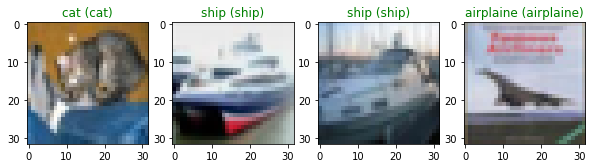

In [22]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 4))
#fig, ax = plt.subplots()
for idx in range(4):
  ax = fig.add_subplot(1, 4, idx+1)
  ax.imshow(X_test[idx])
  y_pred = np.argmax(saved_model.predict(np.expand_dims(X_test[idx], axis=0)), axis=1)
  y_actual= np.argmax(y_test[idx])
  ax.set_title("{} ({})".format(classes[y_pred.item()], classes[y_actual]), color=("green" if y_pred.item()== y_actual else "red"))

### **Observation:** We see that the new model is correctly predicting all the first 4 images in the test data.